<a href="https://colab.research.google.com/github/Jdasanja/mirrored-dataset/blob/main/Corrections_for_Project_1_v1_ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Project 1</h1>**
<body>
    <h1>Framingham Heart Study Dataset</h1>
    <h2>About the Framingham Heart Study</h2>
    <p>The Framingham Heart Study is a long-term, ongoing cardiovascular cohort study on residents of the city of Framingham, Massachusetts. The study began in 1948 with 5,209 adult subjects and has added second and third generation subjects since. It is a major source of data on factors affecting heart disease, and its findings have contributed to the understanding of heart health that has led to the development of guidelines for blood pressure, cholesterol, and other risk factors in maintaining cardiovascular health.</p>
    <h2>Dataset Description</h2>
    <p>This dataset is derived from the Framingham Heart Study and includes various medical and demographic variables used to assess the risk of developing coronary heart disease over a ten-year period. Below is an overview of the columns in the dataset:</p>
    <ul>
        <li><strong>age</strong>: Age of the participant.</li>
        <li><strong>education</strong>: Educational level, encoded numerically.</li>
        <li><strong>currentSmoker</strong>: Indicates whether the participant is a current smoker (1) or not (0).</li>
        <li><strong>cigsPerDay</strong>: Number of cigarettes the participant smokes per day.</li>
        <li><strong>BPMeds</strong>: Indicates whether the participant is on blood pressure medication (1) or not (0).</li>
        <li><strong>prevalentStroke</strong>: Indicates whether the participant has had a stroke previously (1) or not (0).</li>
        <li><strong>prevalentHyp</strong>: Indicates whether the participant has prevalent hypertension (1) or not (0).</li>
        <li><strong>diabetes</strong>: Indicates whether the participant has diabetes (1) or not (0).</li>
        <li><strong>totChol</strong>: Total cholesterol level.</li>
        <li><strong>sysBP</strong>: Systolic blood pressure.</li>
        <li><strong>diaBP</strong>: Diastolic blood pressure.</li>
        <li><strong>BMI</strong>: Body Mass Index.</li>
        <li><strong>heartRate</strong>: Heart rate.</li>
        <li><strong>glucose</strong>: Glucose level.</li>
        <li><strong>TenYearCHD</strong>: Indicates whether the participant is predicted to develop coronary heart disease within the next ten years (1) or not (0).</li>
    </ul>
    <p>The dataset is indexed by gender, using <strong>male</strong> as the index column (1 for male, 0 for female).</p>
</body>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

In [2]:
!pip install pyreadstat

**<h1> Step 1: Importing Dataset</h1>**

In [3]:
url = 'https://github.com/Jdasanja/mirrored-dataset/blob/main/fram_heart_study.csv?raw=true'
df = pd.read_csv(url,index_col=0)
print(df.head(5))

      age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
male                                                                       
1      39        4.0              0         0.0     0.0                0   
0      46        2.0              0         0.0     0.0                0   
1      48        1.0              1        20.0     0.0                0   
0      61        3.0              1        30.0     0.0                0   
0      46        3.0              1        23.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
male                                                                    
1                0         0    195.0  106.0   70.0  26.97       80.0   
0                0         0    250.0  121.0   81.0  28.73       95.0   
1                0         0    245.0  127.5   80.0  25.34       75.0   
0                1         0    225.0  150.0   95.0  28.58       65.0   
0                0         0 

**<h1> Step 2: Divide into a Training and Testing set </h1>**

In [4]:
from sklearn.model_selection import train_test_split

# Define the features and target
# Drop the unique identifier and the target column from features
X = df.drop(columns=['TenYearCHD'])

# Separate the target
y = df['TenYearCHD']

# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now, X_train and X_test contain only relevant feature columns
# y_train and y_test contain only the target variable


In [5]:
train_df = pd.DataFrame(X_train)

**<h1>Step 3: Explore your training set.</h1>**

In [6]:
# Explore the training set
print("DataFrame.info():")
train_df.info()

print("\nDataFrame.describe():")
print(train_df.describe())

DataFrame.info():
<class 'pandas.core.frame.DataFrame'>
Index: 3392 entries, 0 to 0
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3392 non-null   int64  
 1   education        3310 non-null   float64
 2   currentSmoker    3392 non-null   int64  
 3   cigsPerDay       3369 non-null   float64
 4   BPMeds           3348 non-null   float64
 5   prevalentStroke  3392 non-null   int64  
 6   prevalentHyp     3392 non-null   int64  
 7   diabetes         3392 non-null   int64  
 8   totChol          3355 non-null   float64
 9   sysBP            3392 non-null   float64
 10  diaBP            3392 non-null   float64
 11  BMI              3374 non-null   float64
 12  heartRate        3391 non-null   float64
 13  glucose          3071 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 397.5 KB

DataFrame.describe():
               age    education  currentSmoker   cigsPerDay       BPMeds

**<h2> Scanning the Dataframe </h2>**

In [7]:
train_df.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,,,,,,,,,,,,,,
0,46,2.0,1,18.0,0.0,0,0,0,290.0,131.0,84.0,18.28,75.0,68.0
0,63,1.0,0,0.0,0.0,0,0,0,250.0,117.5,75.0,25.88,75.0,91.0
1,58,1.0,0,0.0,0.0,0,0,0,220.0,143.0,104.0,29.85,75.0,87.0
1,44,1.0,1,40.0,0.0,0,0,0,158.0,150.5,87.0,21.44,75.0,98.0
0,45,2.0,0,0.0,0.0,0,1,0,226.0,180.0,99.0,45.79,110.0,NaN


In [8]:
## Basic Descriptive
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3392.000,49.664,8.573,32.000,42.000,49.000,56.000,70.000
education,3310.000,1.983,1.025,1.000,1.000,2.000,3.000,4.000
currentSmoker,3392.000,0.492,0.500,0.000,0.000,0.000,1.000,1.000
cigsPerDay,3369.000,9.020,11.937,0.000,0.000,0.000,20.000,70.000
BPMeds,3348.000,0.029,0.167,0.000,0.000,0.000,0.000,1.000
prevalentStroke,3392.000,0.006,0.080,0.000,0.000,0.000,0.000,1.000
prevalentHyp,3392.000,0.310,0.463,0.000,0.000,0.000,1.000,1.000
diabetes,3392.000,0.026,0.159,0.000,0.000,0.000,0.000,1.000
totChol,3355.000,236.700,44.201,107.000,206.000,234.000,263.000,600.000
sysBP,3392.000,132.440,22.036,83.500,117.000,128.000,144.000,295.000


In [9]:
train_df.shape

(3392, 14)

**<h1>Step 4: Data cleaning.</h1>**

In [10]:
## Total count of missing values
train_df.isnull().sum()

age                  0
education           82
currentSmoker        0
cigsPerDay          23
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             37
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            321
dtype: int64

In [11]:
##Percentage of the column with missing values
train_df.isnull().sum()/len(train_df)*100

age               0.000
education         2.417
currentSmoker     0.000
cigsPerDay        0.678
BPMeds            1.297
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           1.091
sysBP             0.000
diaBP             0.000
BMI               0.531
heartRate         0.029
glucose           9.463
dtype: float64

**<h1>Detecting Missing Values </h1>**

In [12]:
!pip install missingno

In [13]:
import missingno as msno

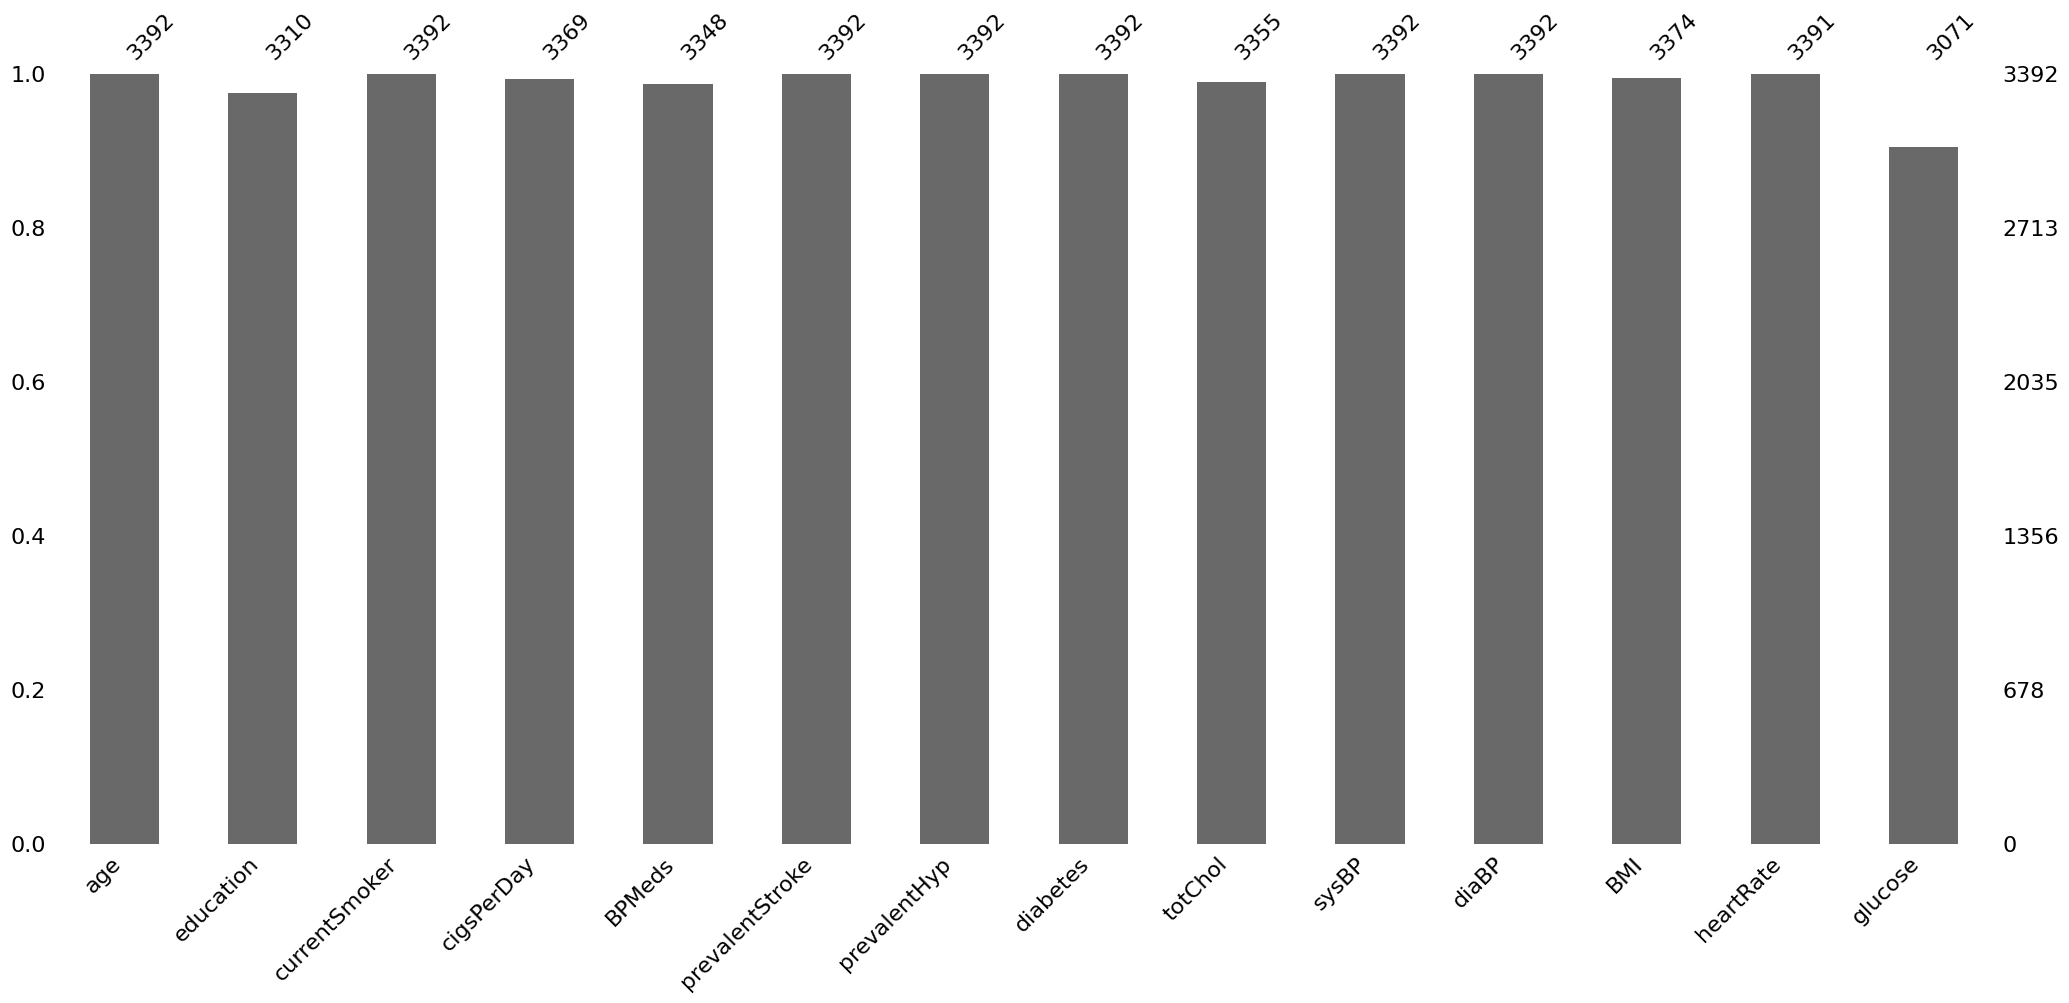

In [14]:
msno.bar(train_df)
plt.show()

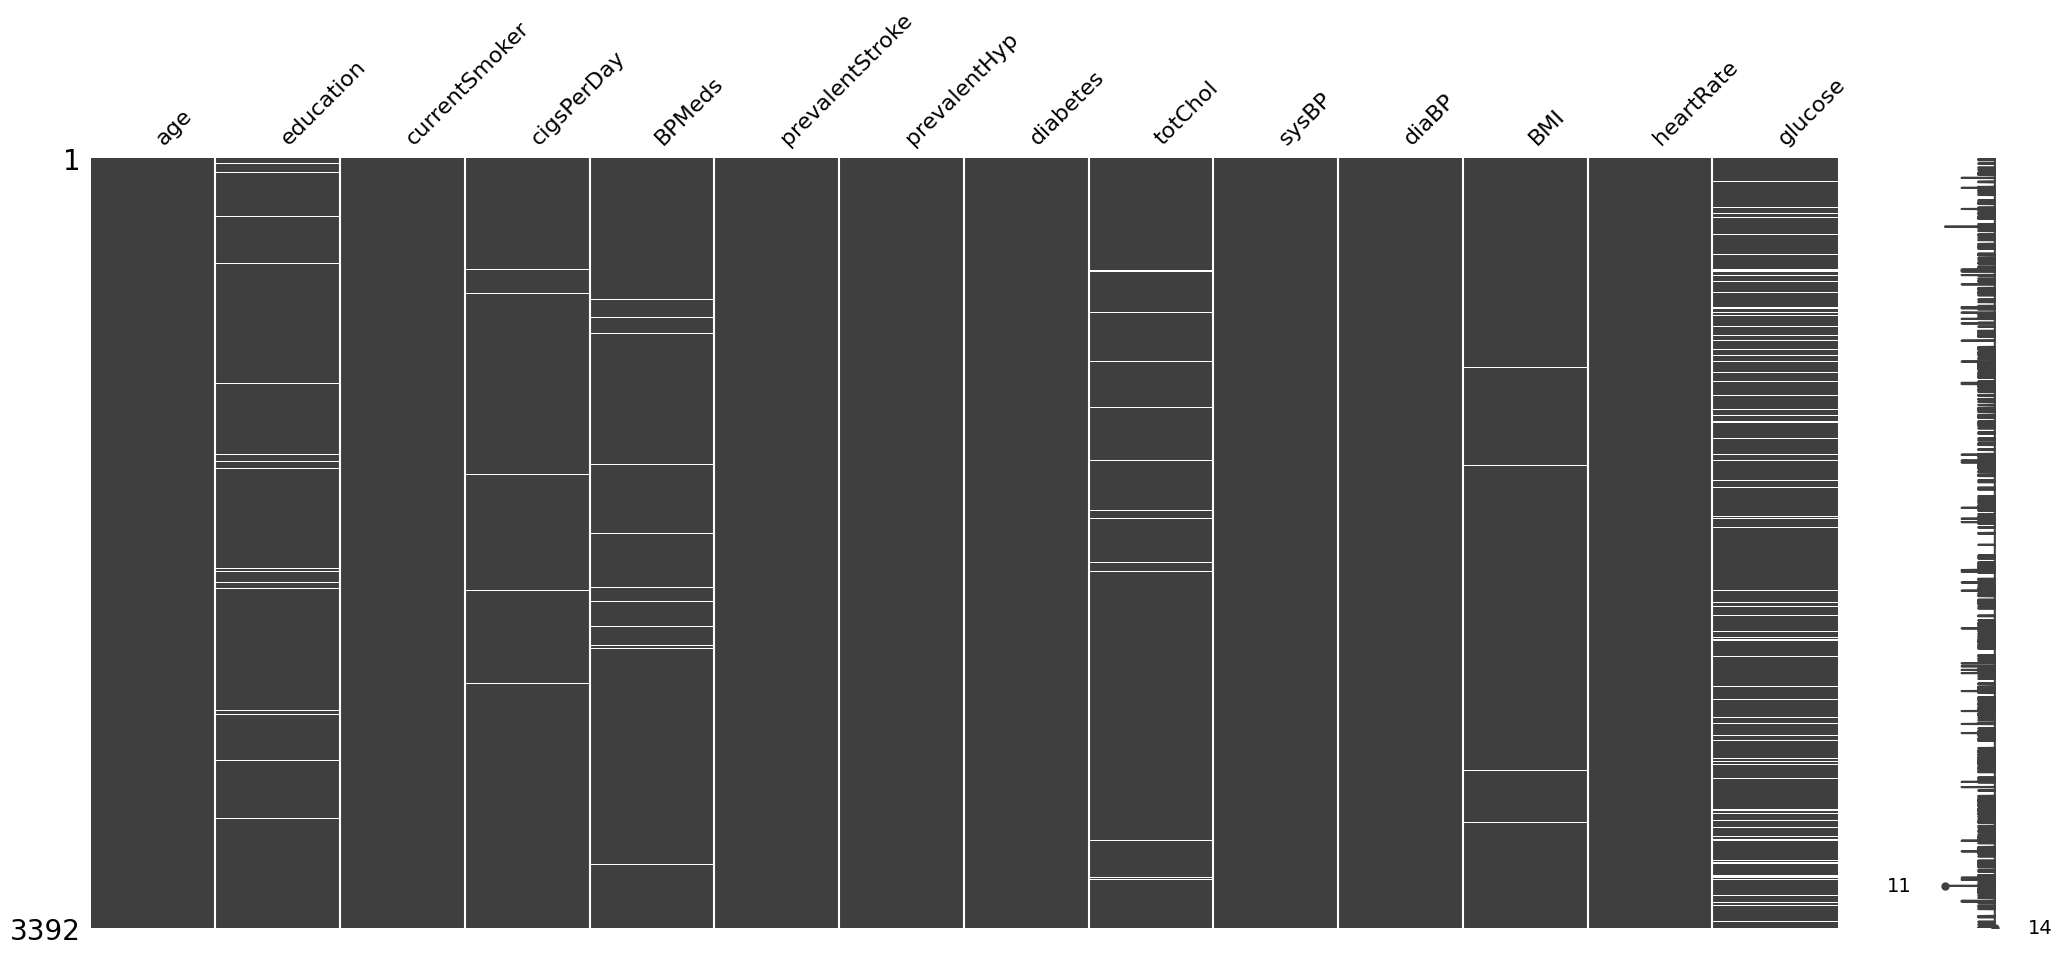

In [15]:
msno.matrix(train_df)
plt.show()

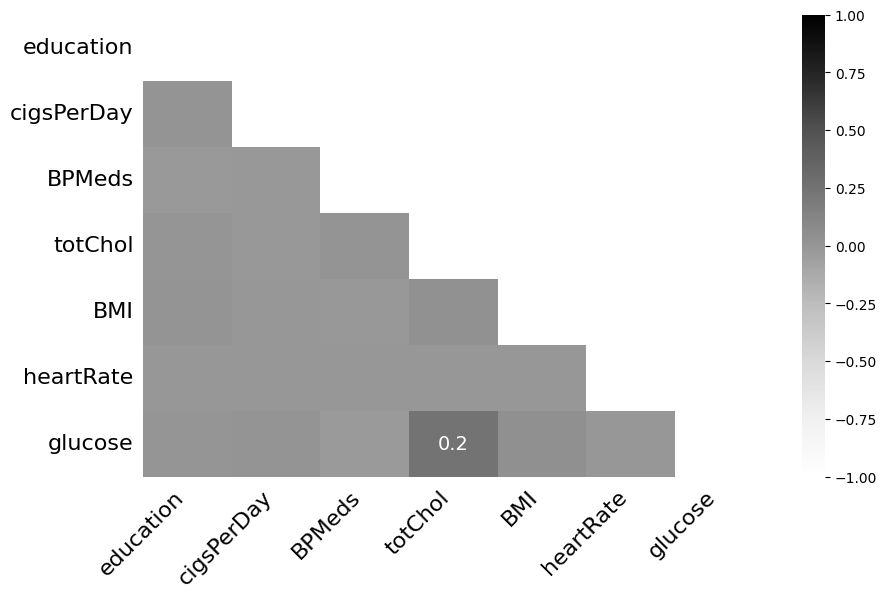

In [16]:
#visualize the relative missingness of columns?
msno.heatmap(train_df, cmap='Greys', figsize=(10, 6))  # Using a grayscale colormap for darker gradient
plt.show()

**<h2>Dealing with missing values </h1>**

In [17]:
#Replacing missing values with the mean value
train_df['glucose'] = train_df['glucose'].fillna(train_df['glucose'].mean())
train_df['education'] = train_df['education'].fillna(train_df['education'].mean())
train_df['BPMeds'] = train_df['BPMeds'].fillna(train_df['BPMeds'].mean())
train_df['totChol'] = train_df['totChol'].fillna(train_df['totChol'].mean())

In [18]:
(train_df.isnull().sum())*100/len(train_df)

age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.678
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.531
heartRate         0.029
glucose           0.000
dtype: float64

In [19]:
## Drop rows with > 10% missingness
train_df = train_df.dropna()

In [20]:
(train_df.isnull().sum())*100/len(train_df)

age               0.000
education         0.000
currentSmoker     0.000
cigsPerDay        0.000
BPMeds            0.000
prevalentStroke   0.000
prevalentHyp      0.000
diabetes          0.000
totChol           0.000
sysBP             0.000
diaBP             0.000
BMI               0.000
heartRate         0.000
glucose           0.000
dtype: float64

**<h2> Checking for Duplicates </h2>**

In [21]:
#check rows for Duplicates
train_df.duplicated().sum()

0

In [22]:
# checking the distribution of data points between the two classes
result_data = pd.DataFrame(y_train)
result_data['TenYearCHD'].value_counts()
majority_class = result_data[result_data['TenYearCHD'] == 0]
minority_class = result_data[result_data['TenYearCHD'] == 1]
print('number of TenYearCHD label 1 is {}'.format(len(minority_class)))
print('while number of TenYearCHD label 0 is {}'.format(len(majority_class)))

#May consider undersampling

number of TenYearCHD label 1 is 515
while number of TenYearCHD label 0 is 2877


**<h1> Step 5:Visualize the data in your training set </h1>**

In [23]:
 train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3350 entries, 0 to 0
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3350 non-null   int64  
 1   education        3350 non-null   float64
 2   currentSmoker    3350 non-null   int64  
 3   cigsPerDay       3350 non-null   float64
 4   BPMeds           3350 non-null   float64
 5   prevalentStroke  3350 non-null   int64  
 6   prevalentHyp     3350 non-null   int64  
 7   diabetes         3350 non-null   int64  
 8   totChol          3350 non-null   float64
 9   sysBP            3350 non-null   float64
 10  diaBP            3350 non-null   float64
 11  BMI              3350 non-null   float64
 12  heartRate        3350 non-null   float64
 13  glucose          3350 non-null   float64
dtypes: float64(9), int64(5)
memory usage: 392.6 KB


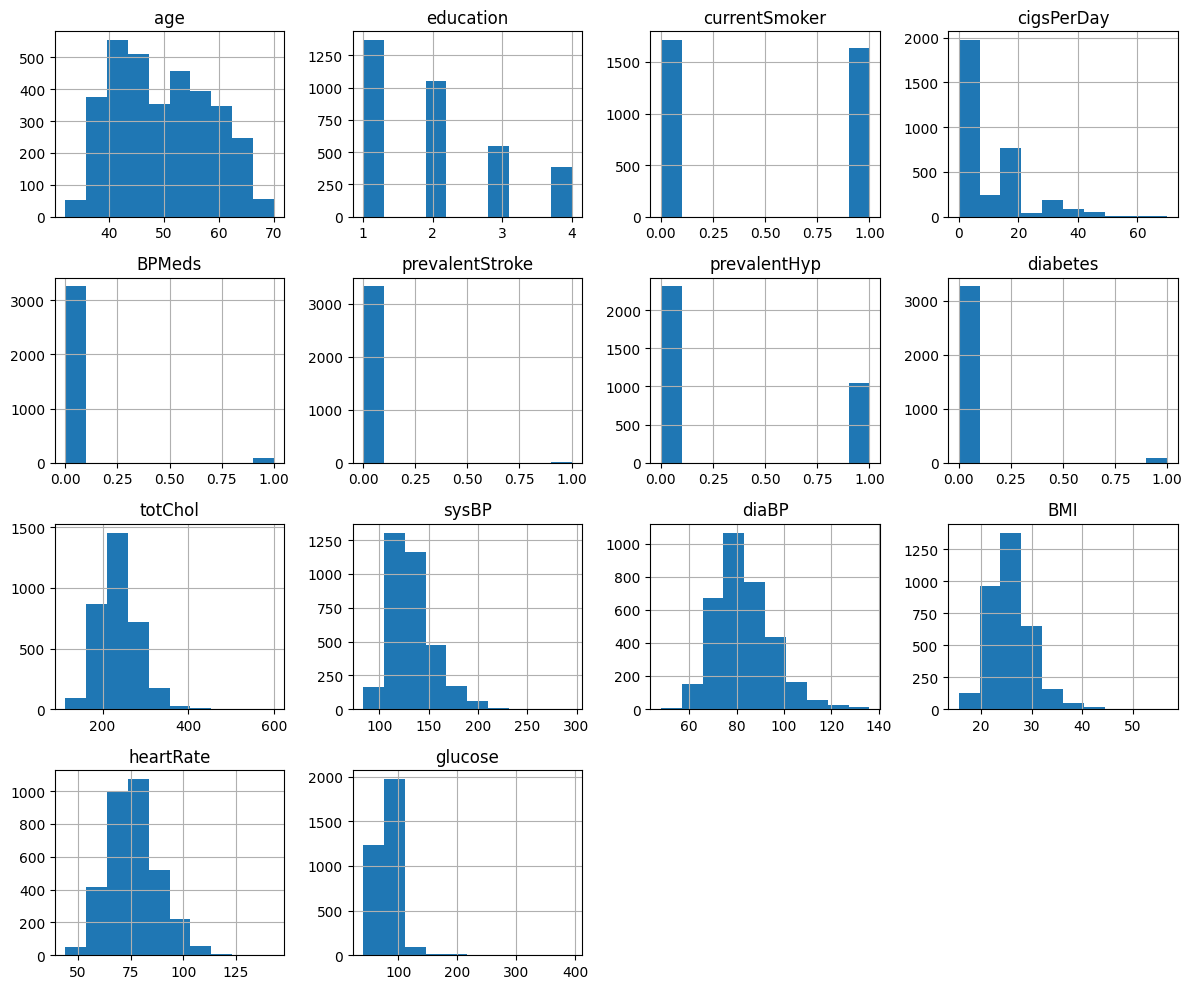

In [24]:
import matplotlib.pyplot as plt

#Histogram
train_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


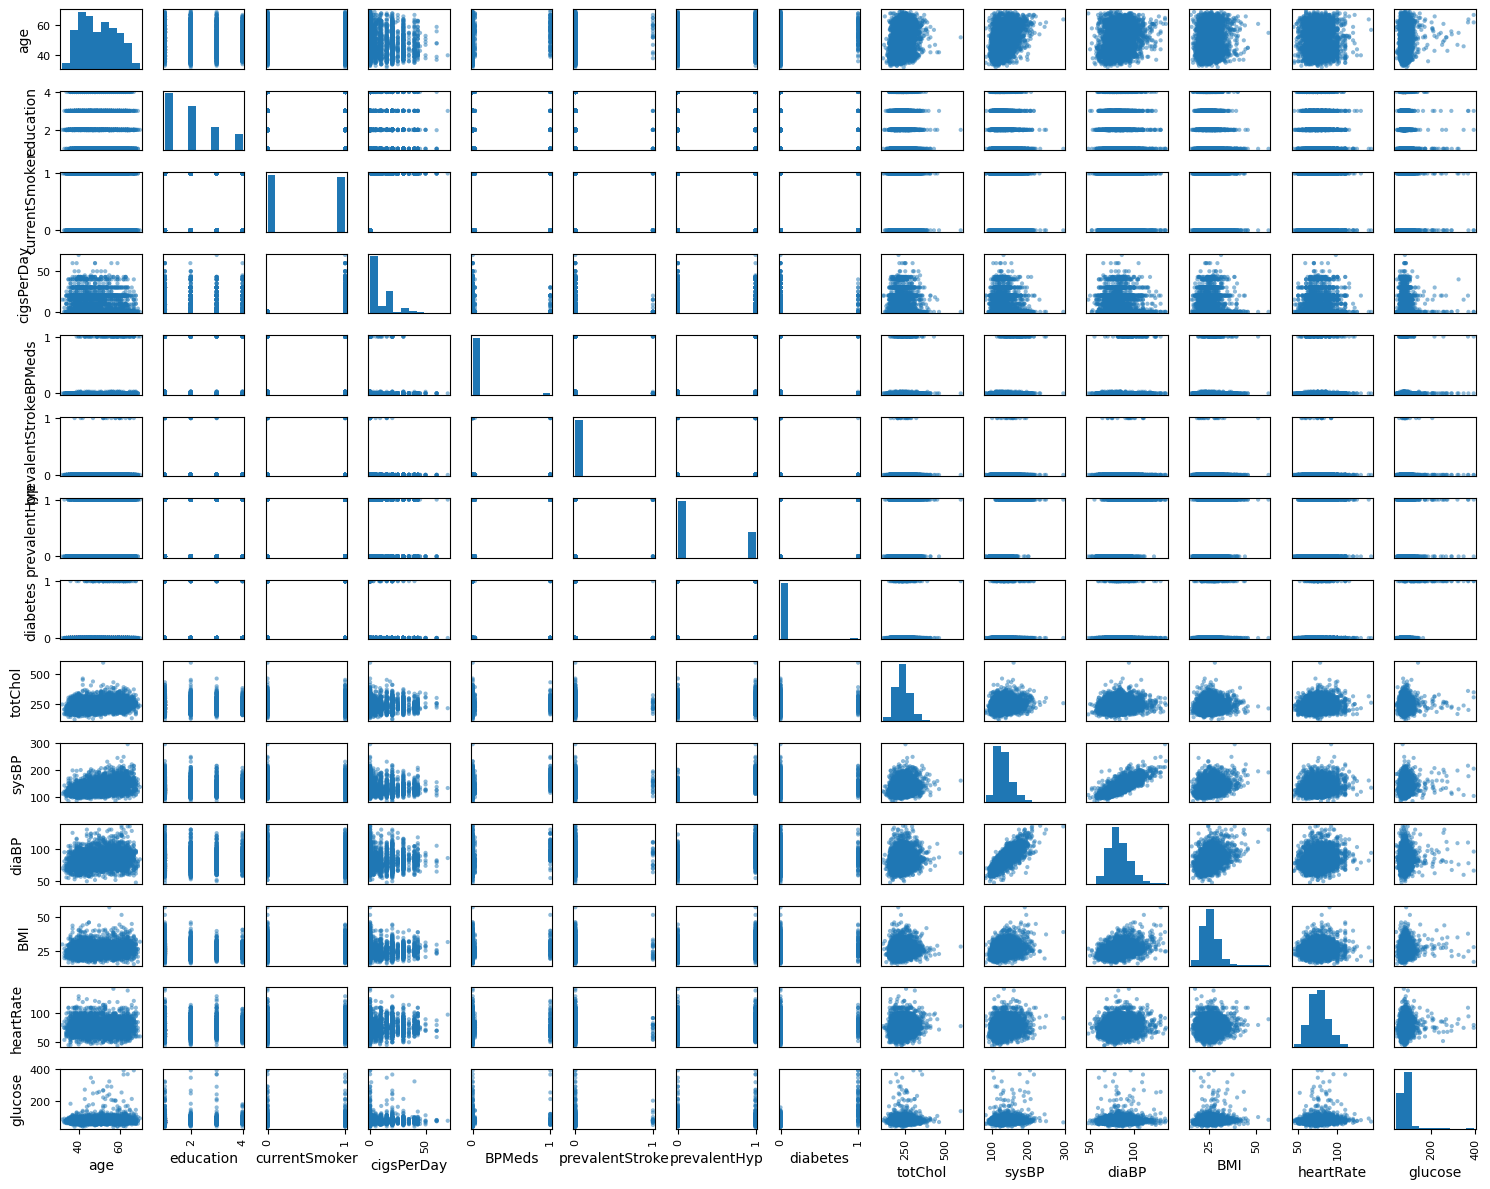

In [25]:
from pandas.plotting import scatter_matrix


scatter_matrix(train_df, figsize=(15, 12))
plt.tight_layout()
plt.show()

**<h1> Step 6: Apply transformations to your data. </h1>**

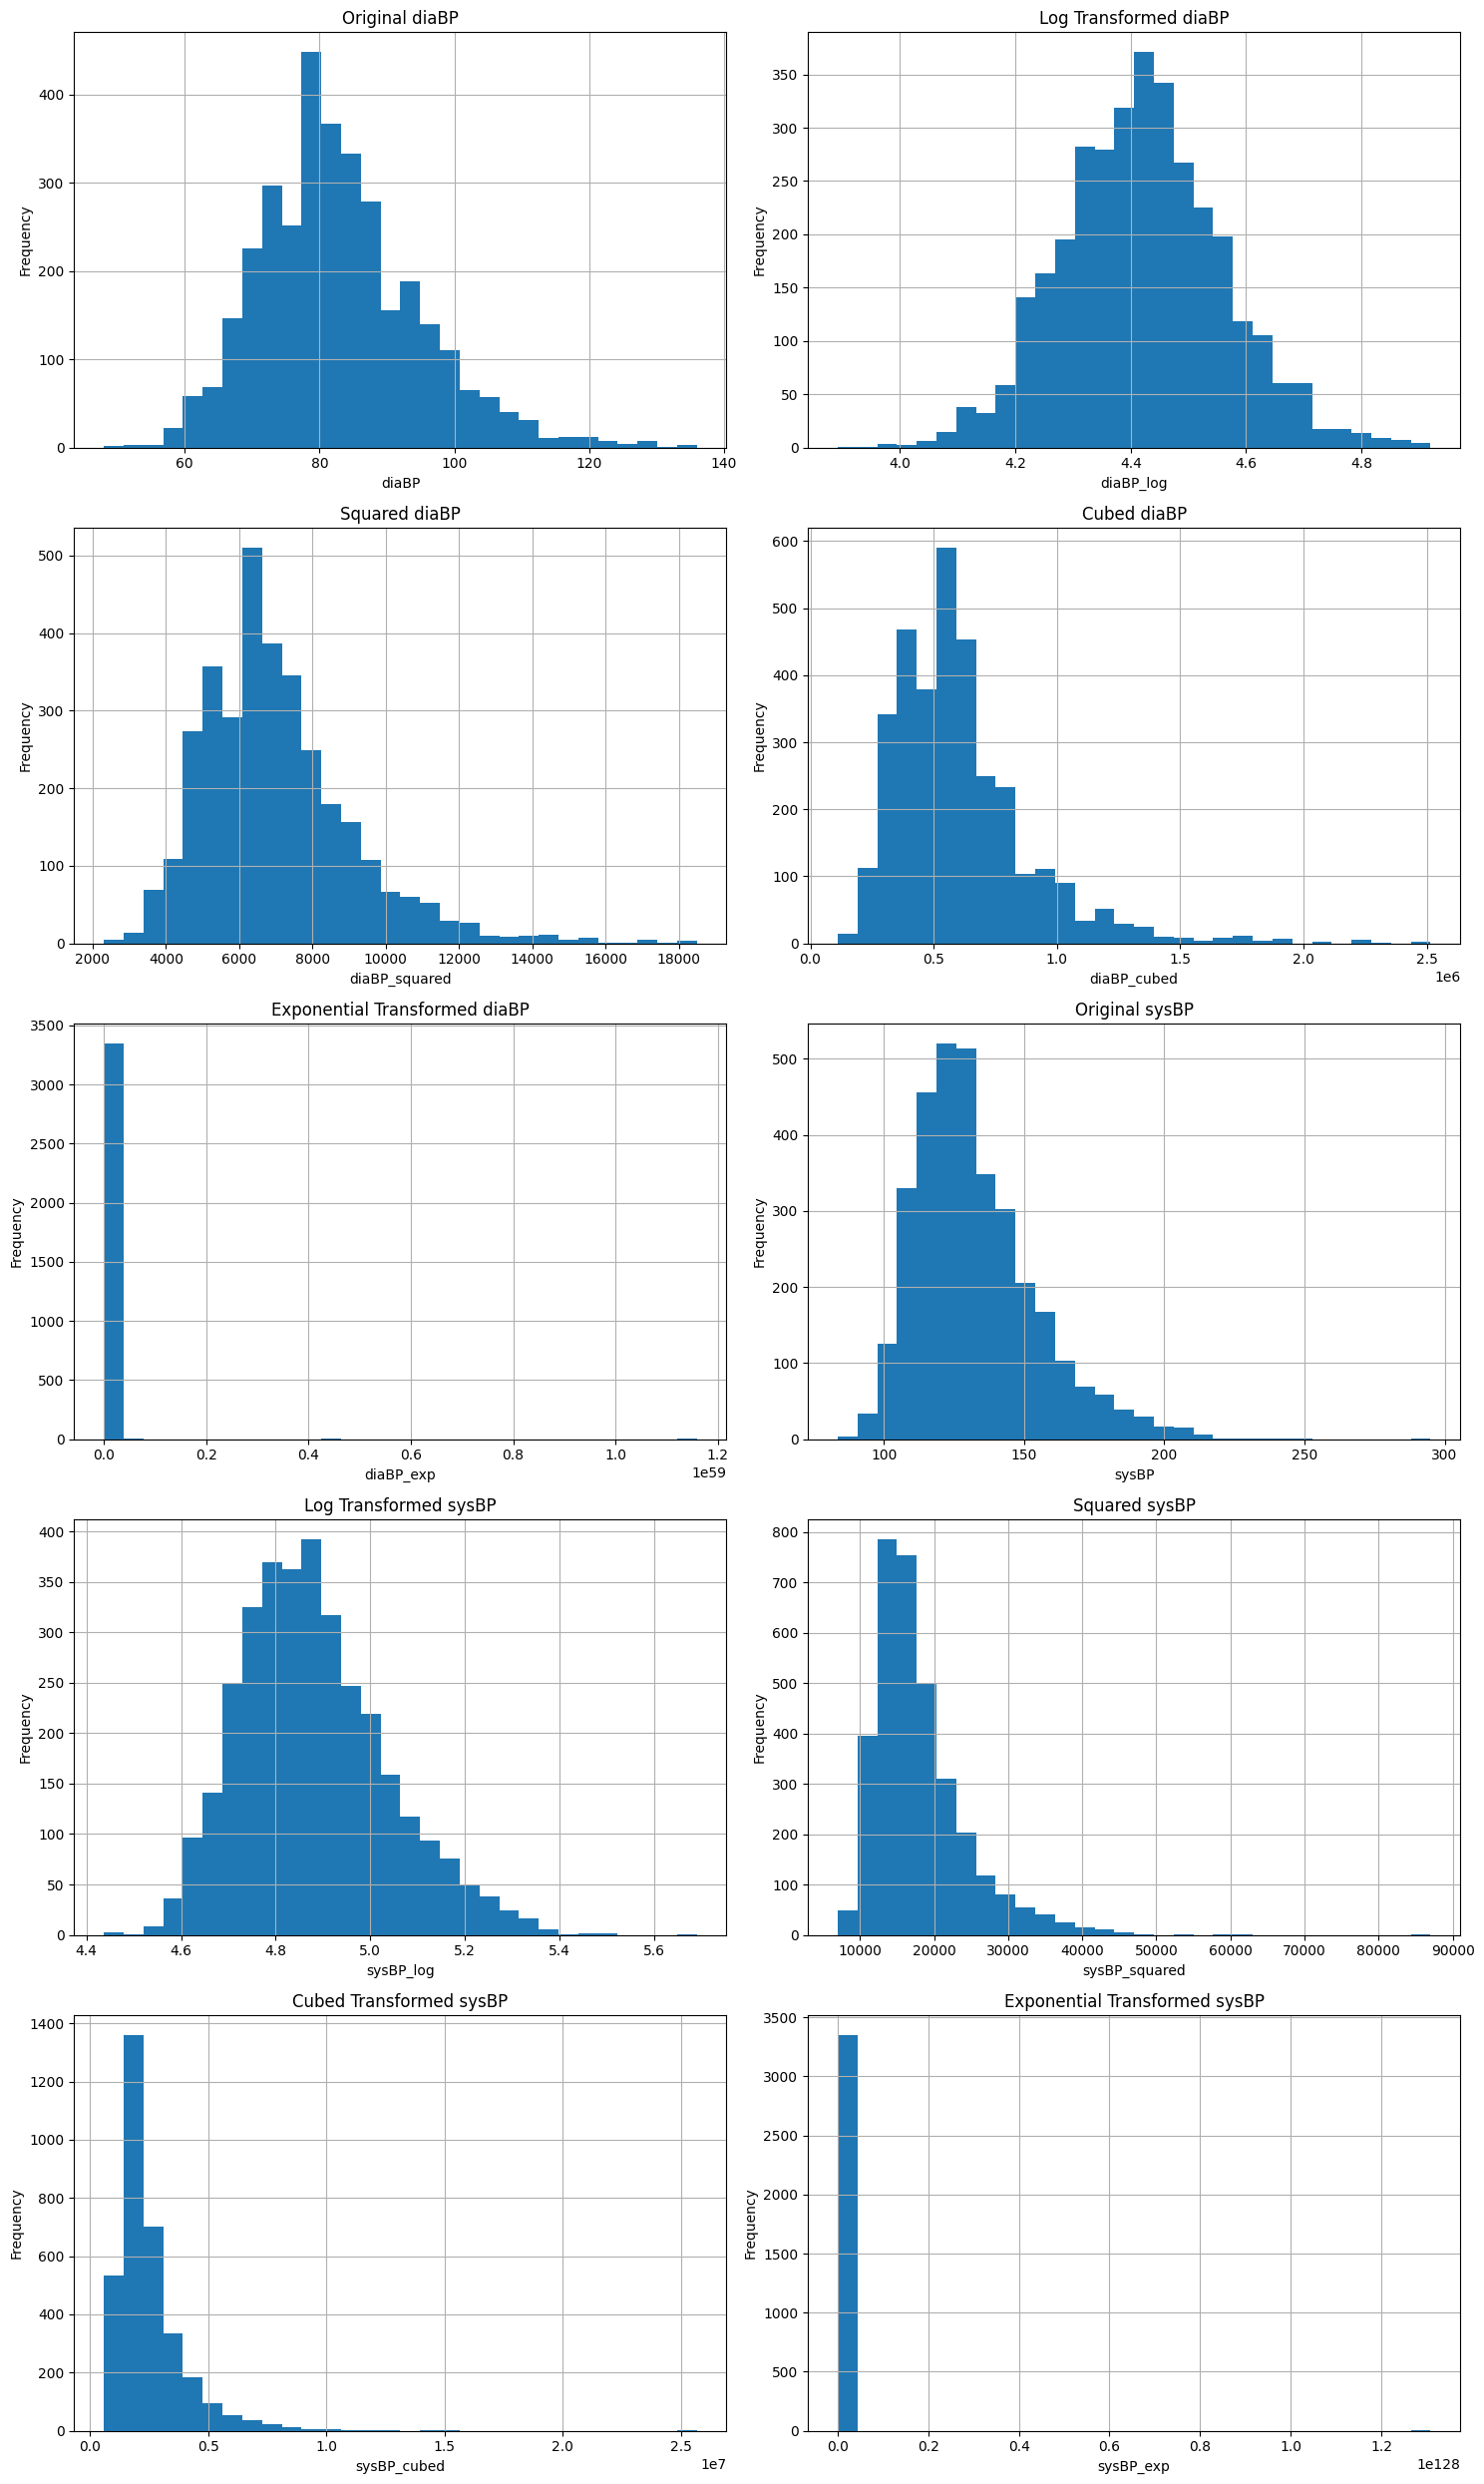

In [26]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Apply transformations: logarithmic, squaring, cubing, and exponential
train_df['diaBP_log'] = np.log(train_df['diaBP'] + 1)
train_df['diaBP_squared'] = np.power(train_df['diaBP'], 2)
train_df['diaBP_cubed'] = np.power(train_df['diaBP'], 3)
train_df['diaBP_exp'] = np.exp(train_df['diaBP'])

train_df['sysBP_log'] = np.log(train_df['sysBP'] + 1)
train_df['sysBP_squared'] = np.power(train_df['sysBP'], 2)
train_df['sysBP_cubed'] = np.power(train_df['sysBP'], 3)
train_df['sysBP_exp'] = np.exp(train_df['sysBP'])

# Set up a subplot grid
fig, axes = plt.subplots(5, 2, figsize=(15, 25))  # Adjusting the grid size for additional plots

# Original and transformed 'DBP' (diaBP)
train_df['diaBP'].hist(ax=axes[0, 0], bins=30)
axes[0, 0].set_title('Original diaBP')
axes[0, 0].set_xlabel('diaBP')
axes[0, 0].set_ylabel('Frequency')

train_df['diaBP_log'].hist(ax=axes[0, 1], bins=30)
axes[0, 1].set_title('Log Transformed diaBP')
axes[0, 1].set_xlabel('diaBP_log')
axes[0, 1].set_ylabel('Frequency')

train_df['diaBP_squared'].hist(ax=axes[1, 0], bins=30)
axes[1, 0].set_title('Squared diaBP')
axes[1, 0].set_xlabel('diaBP_squared')
axes[1, 0].set_ylabel('Frequency')

train_df['diaBP_cubed'].hist(ax=axes[1, 1], bins=30)
axes[1, 1].set_title('Cubed diaBP')
axes[1, 1].set_xlabel('diaBP_cubed')
axes[1, 1].set_ylabel('Frequency')

train_df['diaBP_exp'].hist(ax=axes[2, 0], bins=30)
axes[2, 0].set_title('Exponential Transformed diaBP')
axes[2, 0].set_xlabel('diaBP_exp')
axes[2, 0].set_ylabel('Frequency')

# Original and transformed 'sysBP'
train_df['sysBP'].hist(ax=axes[2, 1], bins=30)
axes[2, 1].set_title('Original sysBP')
axes[2, 1].set_xlabel('sysBP')
axes[2, 1].set_ylabel('Frequency')

train_df['sysBP_log'].hist(ax=axes[3, 0], bins=30)
axes[3, 0].set_title('Log Transformed sysBP')
axes[3, 0].set_xlabel('sysBP_log')
axes[3, 0].set_ylabel('Frequency')

train_df['sysBP_squared'].hist(ax=axes[3, 1], bins=30)
axes[3, 1].set_title('Squared sysBP')
axes[3, 1].set_xlabel('sysBP_squared')
axes[3, 1].set_ylabel('Frequency')

train_df['sysBP_cubed'].hist(ax=axes[4, 0], bins=30)
axes[4, 0].set_title('Cubed Transformed sysBP')
axes[4, 0].set_xlabel('sysBP_cubed')
axes[4, 0].set_ylabel('Frequency')

train_df['sysBP_exp'].hist(ax=axes[4, 1], bins=30)
axes[4, 1].set_title('Exponential Transformed sysBP')
axes[4, 1].set_xlabel('sysBP_exp')
axes [4, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
